#### Author: Diogo Viana

#### February 2023

##### Contact information:
- https://github.com/DiogocViana
- https://www.linkedin.com/in/diogo-viana/



### A/B testing: Mobile Game
### EDA and Hypothesis Testing

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Dictionary](#Data-Dictionary)
3. [Profiling](#Profiling)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [A/B testing](#A/B-testing)
    | 5.1[Part I](#Part-I)
    | 5.2[Part II](#Part-II)
6. [Conclusion](#Conclusion)
7. [Reference](#Reference)

## Introduction

The dataset was extract from the Kaggle website where an user made it avaible after completing a project from Datacamp.

The dataset that will be analysed has the information of a popular mobile puzzle game `Cookie Cats` developed by Tactile Entertainment. This classic game has the "connect three" style puzzle game where the player should put tiles of the same color togheter in order to clean the board and pass to the next level.

The players will experience gates that have the intention to force them to wait a specific time or perform an in-app purchase before progressing. The gate in the game is on the level 30. We need to understant which level is the best with less impact in player retention. Therefore, this project has the intetion to find out the best level to put the gate and we will perform an analysis of the result of an A/B test where the first gate in `Cookie Cats` was moved from level 30 to level 40.

## Data Dictionary

Please, take a moment to read and understand the data dictionary below. This will be a useful reference if we are ever confused about what a particular column of data means.

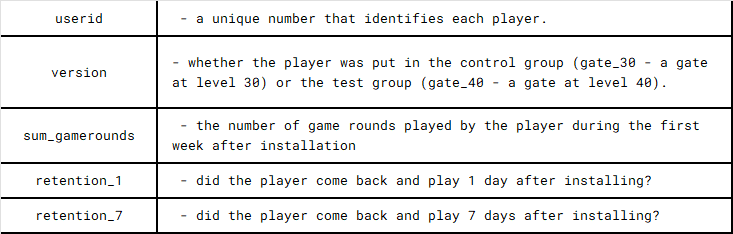

In the next part I will run these codes to be able to use them during my analysis.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.regression import linear_model
from scipy import stats
from scipy.stats import norm
%matplotlib inline

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

After importing the functions, I will tell Python to read the csv file.

In [51]:
# I am calling the csv as df  
df = pd.read_csv("cookie_cats.csv")

Now that I have read the file, I will start by profiling the data and then perform an exploratory data analysis (EDA).

## Profiling

In [52]:
# Checking the first rows in order to know what I have for my analysis

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [53]:
# Checking the size
df.shape

(90189, 5)

As we can observe from the above code, this dataset has 90,189 rows of data and 5 variables.

##### Next steps:
- Check data types and formats

- Check for duplicated data

- Check for missing data

**Step 1**
- Data-types and formats

In [54]:
# Check using data types

df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

As observed, there are two numerical columns, one categorical, and two booleans.

**Step 2**
- Check for duplicated data

In [55]:
# Checking for duplicates.

df.duplicated().sum()

0

There is no duplicates in this dataset

**Step 3**
- Check for missing data

In [56]:
# Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [57]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

There is no missing data.

## Exploratory Data Analysis

**Summary of the unique values for each column:**

In [58]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

Now, I will check each column individually:

In [59]:
df['userid'].unique()

array([    116,     337,     377, ..., 9999710, 9999768, 9999861],
      dtype=int64)

In [60]:
df['userid'].nunique()

90189

As expected, for being the unique number that identifies each player, the user_id column is the same size of the dataset.

In [61]:
df['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [62]:
df['version'].nunique()

2

There are only two unique values for this column, one being the control group and the other test group.

In [63]:
df['sum_gamerounds'].unique()

array([    3,    38,   165,     1,   179,   187,     0,     2,   108,
         153,    30,    39,   305,    73,    14,   204,     9,     5,
          45,   105,     4,    80,    53,    37,    13,    50,   202,
          23,   103,    27,    15,    49,     7,   386,    25,    12,
           6,    29,   136,    10,    76,   138,    94,    26,   127,
          21,   297,    33,   139,    19,    16,    95,     8,   106,
          22,    11,   246,    54,    66,   122,    75,    17,    24,
          47,    31,    34,    56,    60,    67,    42,    65,   129,
          51,    46,   104,    36,    20,    74,    72,    18,    79,
          99,    91,   149,    68,   277,   493,   274,    32,    85,
         191,   115,   134,   152,   100,   250,   147,   391,    61,
          57,    35,    77,   197,    69,   260,    48,   270,    59,
         141,   467,    40,    43,    93,   222,   334,    58,    84,
          41,   303,   177,   216,   227,    87,    71,   567,    55,
          78,   552,

In [64]:
df['sum_gamerounds'].nunique()

942

As we could see, there are 942 unique values for the number of game rounds played by the player during the first 7 days from the installation.

In [65]:
df['retention_1'].unique()

array([False,  True])

In [66]:
df['retention_1'].nunique()

2

In [67]:
df['retention_7'].unique()

array([False,  True])

In [68]:
df['retention_7'].nunique()

2

For being boolean columns, these columns have only two different values each.

After completing this part, I will perform a deeper analysis.

In [69]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [70]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

For a better visualization, I will plot.

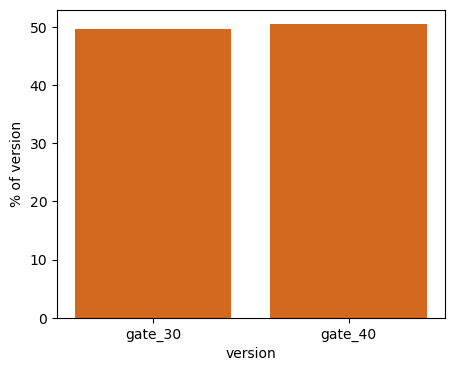

Class imbalance: [0.5 0.5]


In [71]:
# Plotting to better visualize

values, counts = np.unique(df['version'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (5,4))
plt.bar(["gate_30", "gate_40"], normalized_counts*100, color='chocolate') # plot normalized counts
plt.xlabel('version')
plt.ylabel('% of version')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

After downloading and installing the game, each player was randomly allocated into either gate_30 or gate_40. As we can see, the division between the groups was well done and there is no imbalance between the two categories.

##### Top 10 - User with most game rounds 

In [72]:
user_with_highest_game_rounds = df[['version', 'sum_gamerounds']].sort_values('sum_gamerounds', ascending=False)
user_with_highest_game_rounds = user_with_highest_game_rounds.head(10)
user_with_highest_game_rounds

,version,sum_gamerounds
57702,gate_30,49854
7912,gate_30,2961
29417,gate_40,2640
43671,gate_30,2438
48188,gate_40,2294
46344,gate_30,2251
87007,gate_30,2156
36933,gate_40,2124
88328,gate_40,2063
6536,gate_40,2015


As we could notice, it is clear that the `userid 57,702` is an outlier with almost 50k while the second user with highest usage has around 3k.

Since there are only two numerical columns, ‘userid’ and ‘sum_gamerounds’, I will use the function ‘describe’ to check only the column ‘sum_gamerounds’ because ‘userid’ is the unique identifier.

In [73]:
# Geting the summary stats for numeric columns

df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

Standard deviation tells us about the variability of values in the dataset. As we can observe, the standard deviation is big probably resulted from the one user with almost 50k.

Some important points from the above result:

After the first week of installation,

- 25% of players played only 5 times,
- 50% of players played 16 rounds,
- 75% of players played around 51 rounds.


Let`s check the number of players in each sum_gamerounds: 






In [74]:
df.groupby('sum_gamerounds').userid.count().reset_index()

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
...,...,...
937,2294,1
938,2438,1
939,2640,1
940,2961,1


From the result above, we can say that:

- Almost 4,000 players did not use the game even once. There are probably many different explanations for this event. I will list some of the reasons I could think:
    * After installing, the game may have presented some bug and the player was not able to continue,
    
    * The player installed too many games and does not have time to play all the games or forgot about it.
   
   
- In the total of 90,189 players, around 10,000 players played the game only once or twice

    * The player only installed because when the app appeared in the social media ad it looks cool, but then realized it was not,
    
    * Maybe the game takes too long to load and the player loses interest.
    
    
As we can see, a great deal of the players quit playing after some rounds. Therefore, it is important to further investigate why it is happening. A good option would be to check the feedback left from some player, which could help understand more about what is happening after the installation process.

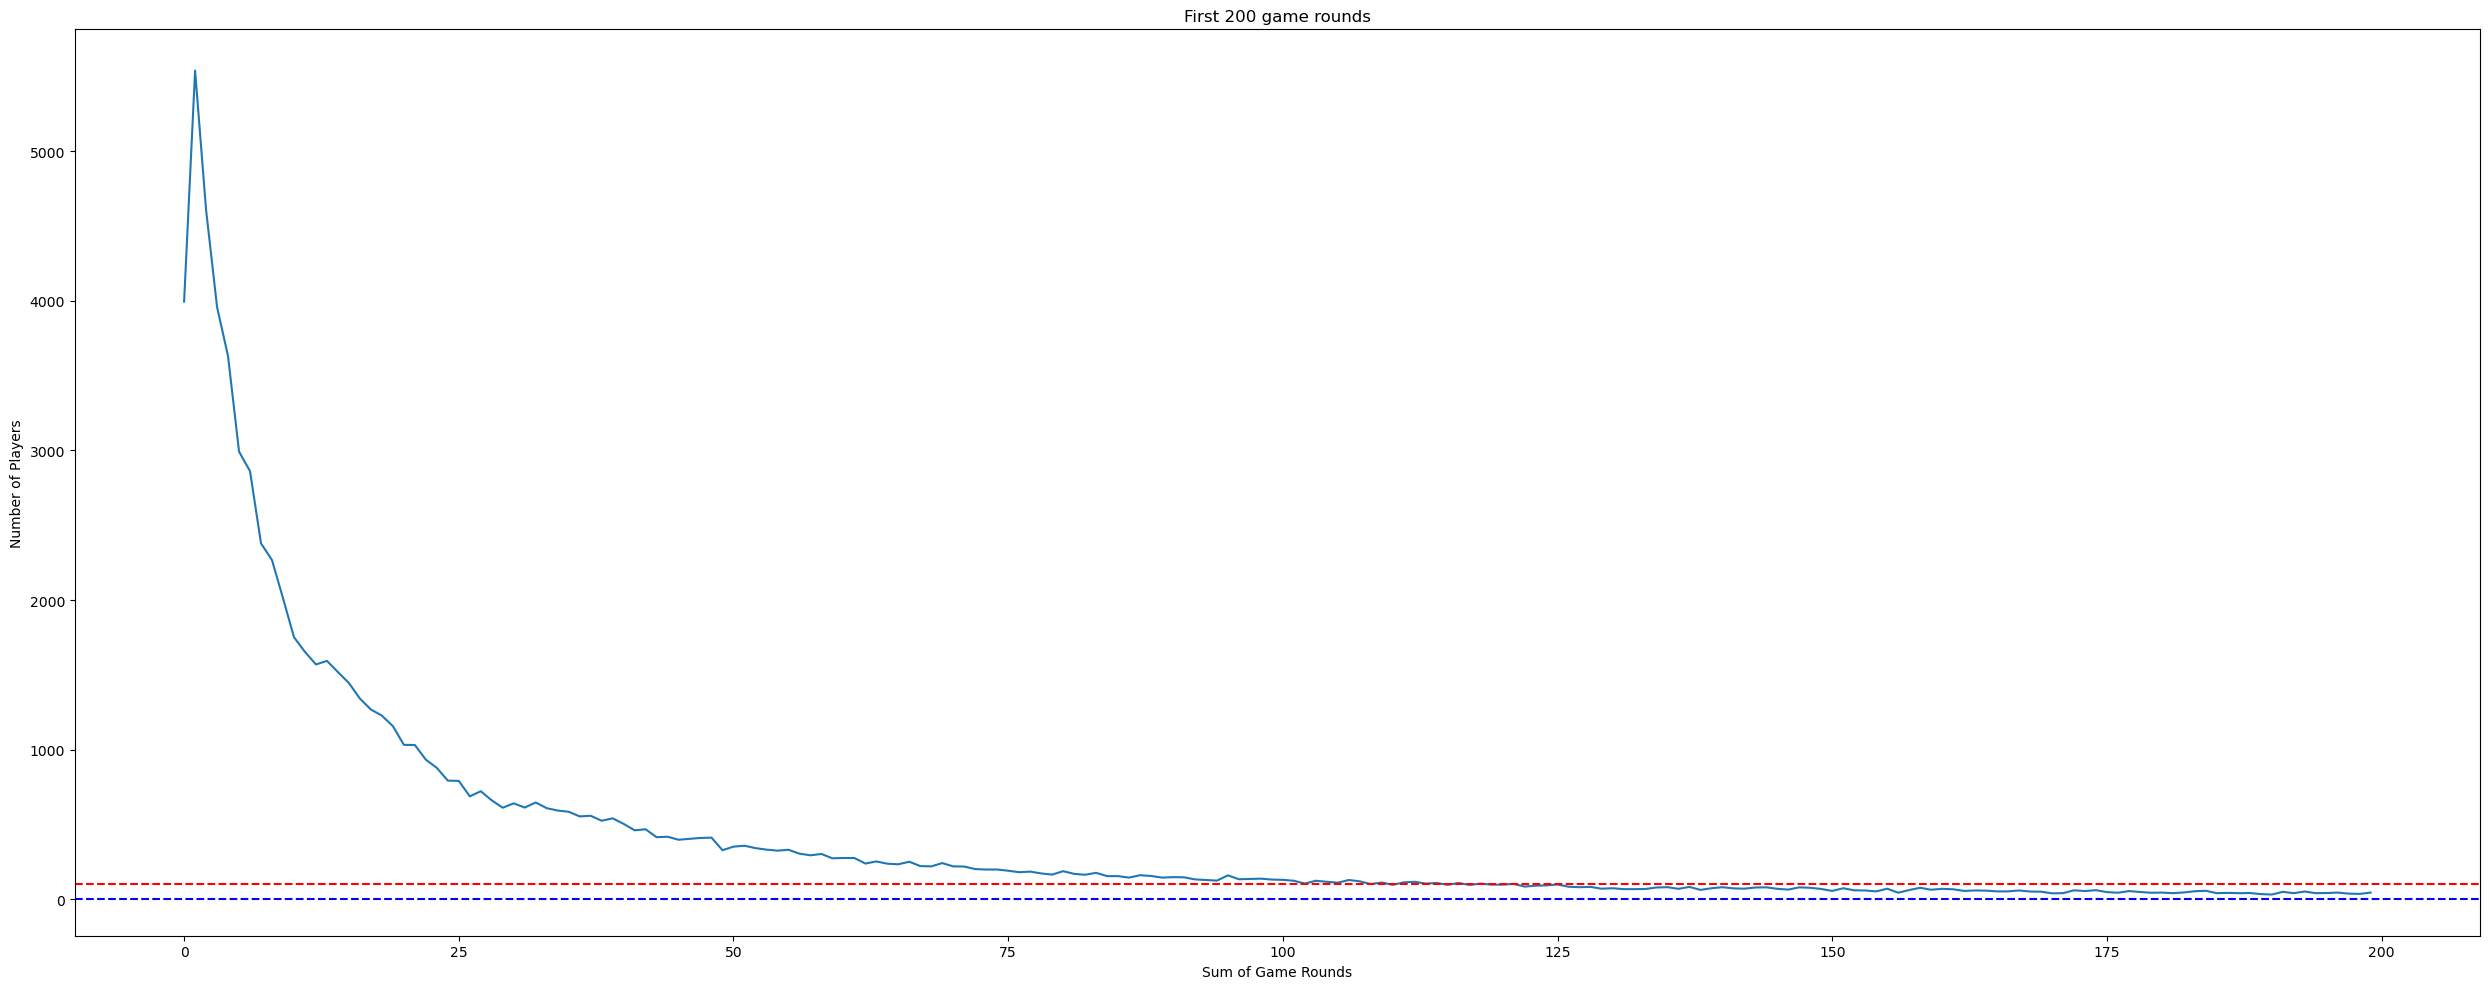

In [75]:
plt.figure(figsize=(25,10))

df.groupby("sum_gamerounds").userid.count()[:200].plot()
plt.axhline(100, c='r', linestyle='--')
plt.axhline(0, c='b', linestyle='--')
plt.title("First 200 game rounds")
plt.xlabel("Sum of Game Rounds")
plt.ylabel('Number of Players')


plt.tight_layout()

plt.show()

We can observe, as expected, The majority of players played less than 25 and then did not come back to play again. 

As it is visible, the red line (100 players) touches the sum of game rounds around 100 rounds. While the blue line, which indicates the number of players equal 0, does not touch the sum of game rounds in this 200 limit, however, it stays very close by the end of the graphic.

In [76]:
df.cov()

,userid,sum_gamerounds,retention_1,retention_7
userid,8.313336e+12,1.038559e+06,-3720.530079,-2957.749424
sum_gamerounds,1.038559e+06,3.804484e+04,19.155356,21.199675
retention_1,-3.720530e+03,1.915536e+01,0.247001,0.063323
retention_7,-2.957749e+03,2.119968e+01,0.063323,0.151446


Covariance shows the relationship between two variables, it means that when one of these variables variates, the other also changes. When the covariance is positive, an increase in one variable implicates a rise on the other variable as well (Team, 2022).

As we can see, the `sum_gamerounds` presented positive covariance with `retention_1` and `retention_7` which means these are directly proportional.

In [77]:
df.corr()

,userid,sum_gamerounds,retention_1,retention_7
userid,1.000000,0.001847,-0.002596,-0.002636
sum_gamerounds,0.001847,1.000000,0.197603,0.279288
retention_1,-0.002596,0.197603,1.000000,0.327401
retention_7,-0.002636,0.279288,0.327401,1.000000


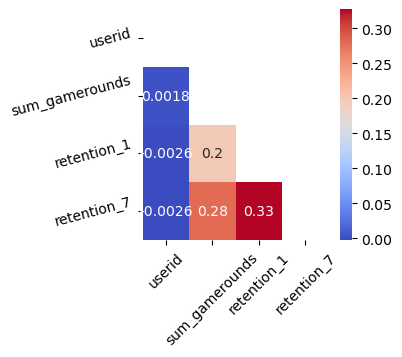

In [78]:
plt.figure(figsize=(3,3))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=15)
plt.show()

We are able to conclude that the correlations are not statistically significant for most of the features because they are smaller than 0.30. However, `retention_1` and `retention_7` have a correlation of 0.33, this could be because of when the player did not come back and play 1 day after installing and also did not come back in 7 days.

After completing the above part, I can continue with a further investigation.

In the next part, I will check the `retention_1` and `retention_7` columns.

In the video gaming industry, it is very important to check if the player will come back to play the game again. Therefore, one metric utilized is to investigate if the player came back or not after the first day. When the player comes back after the first day, it usually means that he/she will come back again after that.

The following part, I will conduct an analysis first with 1 day retention and then 7 days retention comparing the control group and test group.

Before proceeding with the A/B test, we could verify the difference between gates on level 30 and 40 using the mean.

###### Retention_1 - Did the player come back and play 1 day after installation?

In [79]:
df.groupby('retention_1').count()

,userid,version,sum_gamerounds,retention_7
retention_1,,,,
False,50036,50036,50036,50036
True,40153,40153,40153,40153


In [80]:
df.groupby("version")["retention_1"].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

According to the above result, moving the gate from level 30 to level 40 will have a small impact in the one day retention. It was a small decrease of 0.59%.

######  Retention_7 - Did the player come back and play 7 days after installation?

In [81]:
df.groupby('retention_7').count()

,userid,version,sum_gamerounds,retention_1
retention_7,,,,
False,73408,73408,73408,73408
True,16781,16781,16781,16781


In [82]:
df.groupby("version")["retention_7"].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

As observed, moving the gate from level 30 to level 40 will also have a small impact in the seven day retention. It was a small decrease of 0.82%.

Therefore, when using the mean to compare the difference between gates on level 30 or 40, in both, one and seven days retention, there was a very slight decrease. We could say that the average retention looks very similar.

## A/B testing

#### I will perform the following steps:

* 1. Define business question and performance metric


* 2. Check for normality - By applying Shapiro-Wilk Test
    * By using Shapiro_wilk test - a null hypothesis that data is normal and an alternate hypothesis that the data is not
    
    $$ H_0 : \text{Data is normally distributed}\quad  (p<0.05)\quad vs. \quad H_1 : \text{Data is not normally distributed} $$
    
    
* 3. Compare group performance and determine if the difference is statistically significant (with hypothesis testing)
    * If normal - proceed with **proportions z-test**
    * If non-normal - proceed with **Mann-Whitney U test**
    
    **Our null and alternative hypotheses are:**

- $H_0$: The mean of gate_30 = The mean of gate_40
- $H_1$: The mean of gate_30 $\neq$ The mean of gate_40

 We will use a significance level of 0.05 as usual.

#### Step 1 - Business problem / question

##### *Our business problem involves deciding if the first gate in the mobile game Cookie Cats should be moved from level 30 to level 40 and understand the impact this change would have on player retention.*

Now, let's divide our analysis in two parts, 1-day retention and 7-day retention

### **Part I**

##### Investigating column `retention_1`

#### Step 2

In [83]:
retention_1 = df.groupby(['version','retention_1']).size()
retention_1

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [84]:
#make a new dataset
retention_1 = pd.DataFrame(data=[[20034,20119],[24666,25370]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_1

,gate_30,gate_40
True,20034,20119
False,24666,25370


In [85]:
# calculating the shapiro test statisic and its p-value
stats.shapiro(retention_1)

ShapiroResult(statistic=0.7931954860687256, pvalue=0.09056650102138519)

As we could observe, we have evidence of non-normality of residuals in the model. Therefore, being p-value>0.05, we will reject the Null Hypothesis.

Since Shapiro-Wilk test rejected H0 for normality assumption, we need to apply the ***Mann-Whitney U test*** a Non-Parametric Statistical Test.

#### Step 3

###### Mann-Whitney U test

In [86]:
stats.mannwhitneyu(retention_1['gate_30'], retention_1['gate_40'])

MannwhitneyuResult(statistic=1.0, pvalue=0.6666666666666666)

As we can observe from the result above, the Mann-Whitney U test rejected the Null Hypothesis.

Therefore, we could say that gate_30 and gate_40 are not similar. Which means there is a statistically significant difference between both groups about moving the first gate from level 30 to 40 for game rounds related to one day retention.

### **Part II**

#### Step 2

##### Investigating column `retention_7`

In [87]:
retention_7 = df.groupby(['version','retention_7']).size()
retention_7

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [88]:
#make a new dataset
retention_7 = pd.DataFrame(data=[[8502,8279],[36198,37210]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_7

,gate_30,gate_40
True,8502,8279
False,36198,37210


In [89]:
# calculating the shapiro test statisic and its p-value
stats.shapiro(retention_7)

ShapiroResult(statistic=0.7476582527160645, pvalue=0.036716360598802567)

As we could observe, we have evidence of normality of residuals in the model. Therefore, being p-value<0.05, we cannot reject the Null Hypothesis.

Since Shapiro-Wilk test did not reject H0 for normality assumption. Since we are trying to detect the impact in moving the gate from level 30 to 40, we are going to proceed with **proportions z-test**.

#### Step 3

###### Proportions z-test

In [90]:
counts_true = [8502, 8279]
n_obs = [44700, 45489]
proportions_ztest(counts_true, n_obs)

(3.164358912748191, 0.001554249975614329)

As we can observe from the result above, the proportions z-test cannot rejected the Null Hypothesis.

Therefore, we could say that gate_30 and gate_40 are similar. Which means there is no statistically significant difference between both groups about moving the first gate from level 30 to 40 for game rounds related to seven days retention.

## Conclusion

Firstly, in the profiling part of the project, we were able to check the data types, duplicates and missing values. There were two numerical columns, one object, and two booleans. In addition, there were no duplicates or missing values in the dataset.

Secondly, we performed the exploratory data analysis by starting looking into the unique values for each column. In our deeper analysis in the EDA, we were able to identify that there was no imbalance with the division between the A/B groups (gate_30 and gate_40) and we learned that in the gate_30, there was an outlier with almost 50,000 game rounds. In addition, some important points are that 25% of players played only 5 times and 75% of players played approximately 51 rounds.

Moreover, in my opinion, since 4,000 players did not even use the game once after the installation, the company should investigate the motivation behind this. As mentioned before, looking into user reviews about the game could help identify why it happened.

Before the A/B testing, we checked the impact in player retention from moving the gate from level 30 to 40 using the mean. In both, one day and seven days retention, moving the gate will cause a very small impact in player retention.

In the A/B testing, we started by defining our business problem: `Our business problem involves deciding if the first gate in the mobile game Cookie Cats should be moved from level 30 to level 40 and understand the impact this change would have on player retention`.

After having our business problem well defined, we first checked for normality using the Shapiro-Wilk Test. We divided our data in two parts to perform the analysis, retention_1 and retention_7. This test proved that in the one day retention, the data was not normally distributed and we needed to use a non-parametric test called Mann-Whitney U test. While in the seven day retention, the data was proved to be normal and we proceed with the proportion z-test.

In the one day retention, we rejected the Null Hypothesis ($H_0$: The mean of gate_30 = The mean of gate_40), and could say that there is a statistically significant difference between both groups about moving the first gate from level 30 to 40 for game rounds related to one day retention.

On the other hand, in the seven day retention, we could not reject the Null Hypothesis ($H_0$: The mean of gate_30 = The mean of gate_40), which means there is no statistically significant difference between both groups about moving the first gate from level 30 to 40 for game rounds related to seven days retention.

Therefore, since moving the gate from level 30 to 40 would have a statistically significant impact in players one day retention, the gate should not be moved.

## Reference

Yarkın, M. (2021, February 10). Mobile games A/B testing - cookie cats. Kaggle. Retrieved February 13, 2023, from https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats 

Team, T. I. (2022, August 19). How do you interpret the magnitude of the covariance between two variables? Investopedia. Retrieved February 14, 2023, from https://www.investopedia.com/ask/answers/041515/how-do-you-interpret-magnitude-covariance-between-two-variables.asp#:~:text=Covariance%20indicates%20the%20relationship%20of,a%20decrease%20in%20the%20other 